Code for linear regression and creating data visualizations for DS3000 final project.

As a note: we did not end up using all of these.

Group Members: Ben Weiss, Molly Varrenti, Sheena Kaw

In [1]:
# Import cleaned data from CSV

import pandas as pd

# Load the data from CSV file
movie_data = pd.read_csv('all-movie-data-bad-gross.csv')

movie_data.head()



,Name,Director,Biggest Star,Genre,Month,Year,Rating,Length (minutes),Budget ($),Worldwide Gross ($)
0,Pulp Fiction,Quentin Tarantino,Uma Thurman,Crime,Oct,1994.0,R,94.0,"8,000,000","213,928,762"
1,The Amazing Spider-Man 2,Marc Webb,Andrew Garfield,Action,May,2014.0,PG-13,82.0,"200,000,000","708,982,323"
2,The Shawshank Redemption,Frank Darabont,Morgan Freeman,Drama,Sep,1994.0,R,82.0,"25,000,000","28,884,716"
3,Star Wars: Episode IV - A New Hope,George Lucas,Carrie Fisher,Action,May,1977.0,PG,61.0,"11,000,000","775,398,007"
4,Back to the Future,Robert Zemeckis,Christopher Lloyd,Adventure,Jul,1985.0,PG,116.0,"19,000,000","384,577,472"


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the data
movie_data = pd.read_csv('all-movie-data-bad-gross.csv')

# Step 2: Prepare the data
# For simplicity, let's consider only numerical features for now
# Select relevant features and handle missing values if necessary
selected_features = ['Budget ($)', 'Length (minutes)']
data = movie_data[selected_features + ['Worldwide Gross ($)']].dropna()

# Remove non-numeric characters from the 'Budget ($)' and 'Worldwide Gross ($)' columns and convert them to float
data['Budget ($)'] = data['Budget ($)'].str.replace(r'[^\d.]', '').astype(float)
data['Worldwide Gross ($)'] = data['Worldwide Gross ($)'].str.replace(r'[^\d.]', '').astype(float)

# Step 3: Split the data into training and testing sets
X = data[selected_features]
y = data['Worldwide Gross ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 6: Interpret the results
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)


Mean Squared Error: 1.7633600486871394e+16
R-squared: 0.5518307769665023
Coefficients: [ 3.09140166e+00 -7.67486886e+05]
Intercept: 86137449.26534271


/var/folders/qx/92wx9d5n3w73256cz259mbxw0000gn/T/ipykernel_82398/4220379915.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Budget ($)'] = data['Budget ($)'].str.replace(r'[^\d.]', '').astype(float)
/var/folders/qx/92wx9d5n3w73256cz259mbxw0000gn/T/ipykernel_82398/4220379915.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Worldwide Gross ($)'] = data['Worldwide Gross ($)'].str.replace(r'[^\d.]', '').astype(float)


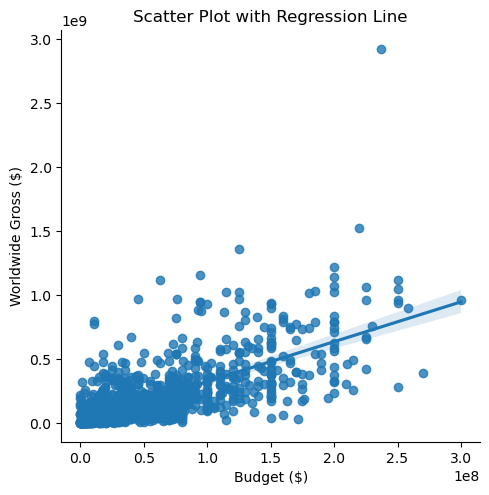

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x='Budget ($)', y='Worldwide Gross ($)', data=data)
plt.title('Scatter Plot with Regression Line')
plt.show()







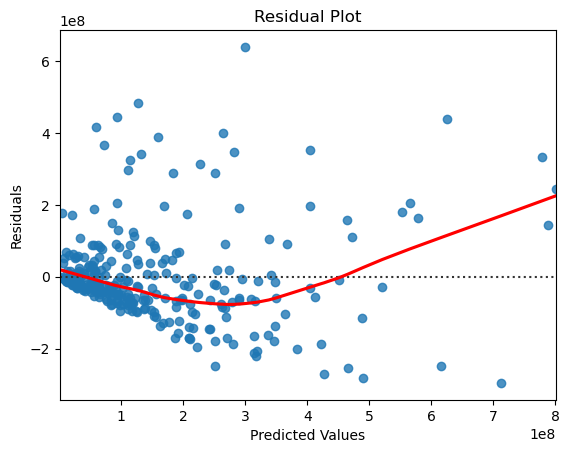

Mean Squared Error: 1.7633600486871394e+16
R-squared: 0.5518307769665023


/var/folders/qx/92wx9d5n3w73256cz259mbxw0000gn/T/ipykernel_82398/576797976.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Budget ($)'] = data['Budget ($)'].str.replace(r'[^\d.]', '').astype(float)
/var/folders/qx/92wx9d5n3w73256cz259mbxw0000gn/T/ipykernel_82398/576797976.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Worldwide Gross ($)'] = data['Worldwide Gross ($)'].str.replace(r'[^\d.]', '').astype(float)


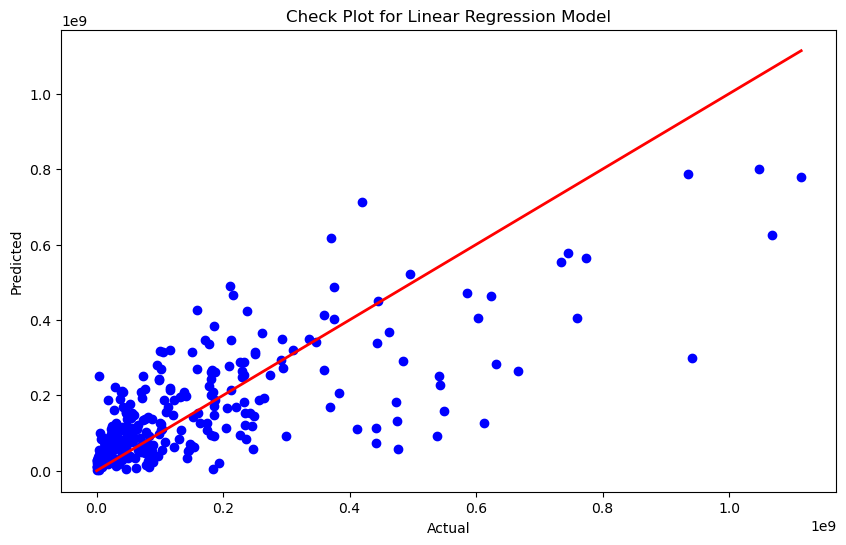

In [4]:
# Residual plot
sns.residplot(x=y_pred, y=y_test, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Get data
movie_data = pd.read_csv('all-movie-data-bad-gross.csv')

selected_features = ['Budget ($)', 'Length (minutes)']
data = movie_data[selected_features + ['Worldwide Gross ($)']].dropna()

# Remove non-numeric characters from the Budget ($) and Worldwide Gross ($) and then convert to float
data['Budget ($)'] = data['Budget ($)'].str.replace(r'[^\d.]', '').astype(float)
data['Worldwide Gross ($)'] = data['Worldwide Gross ($)'].str.replace(r'[^\d.]', '').astype(float)

# Split data into training/testing sets
X = data[selected_features]
y = data['Worldwide Gross ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot check plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Check Plot for Linear Regression Model')
plt.show()


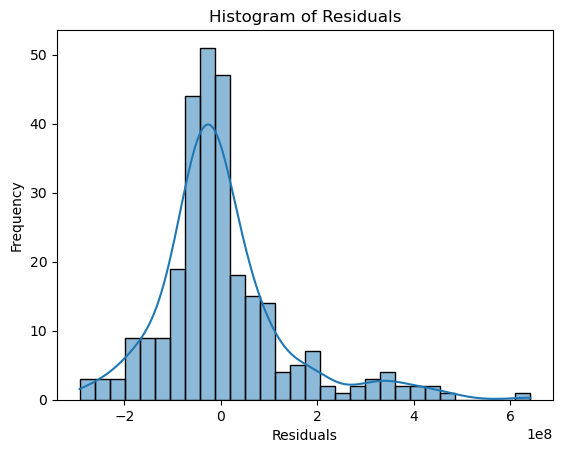

In [5]:
# Histogram of residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

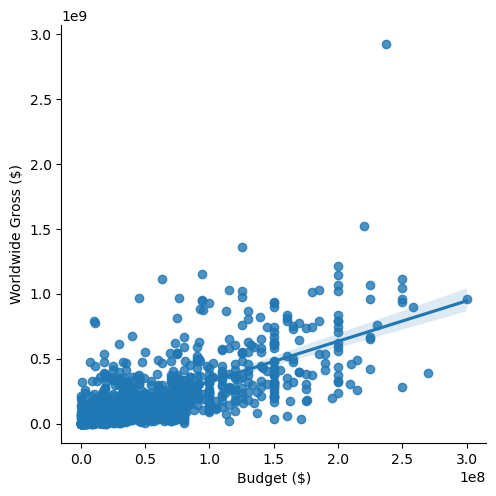

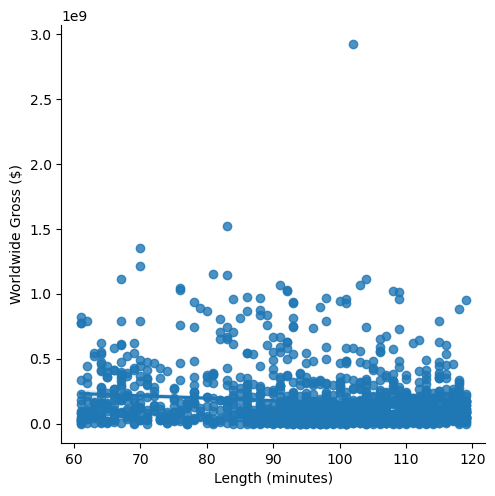

In [6]:
# Partial regression plot
sns.pairplot(data, x_vars=['Budget ($)'], y_vars='Worldwide Gross ($)', kind='reg', height=5)
sns.pairplot(data, x_vars=['Length (minutes)'], y_vars='Worldwide Gross ($)', kind='reg', height=5)
plt.show()

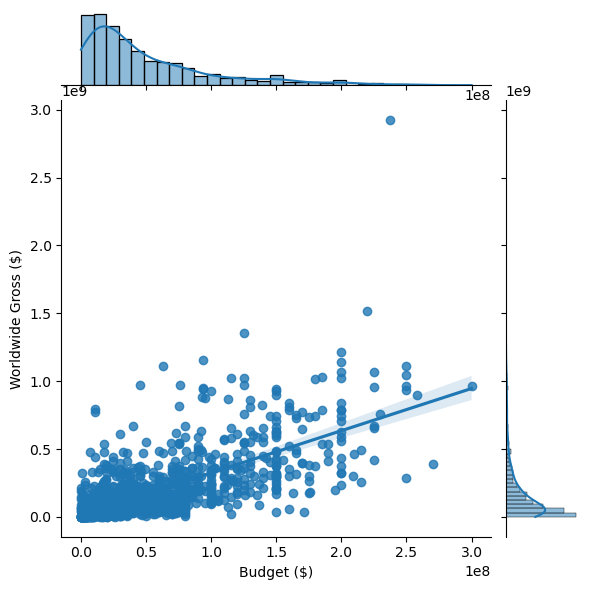

In [7]:
# Joint plot
sns.jointplot(x='Budget ($)', y='Worldwide Gross ($)', data=data, kind='reg')
plt.show()

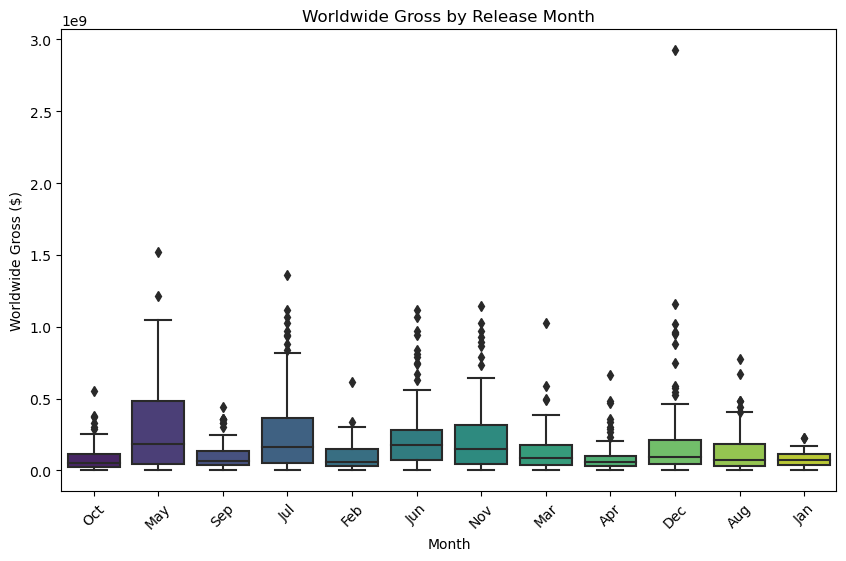

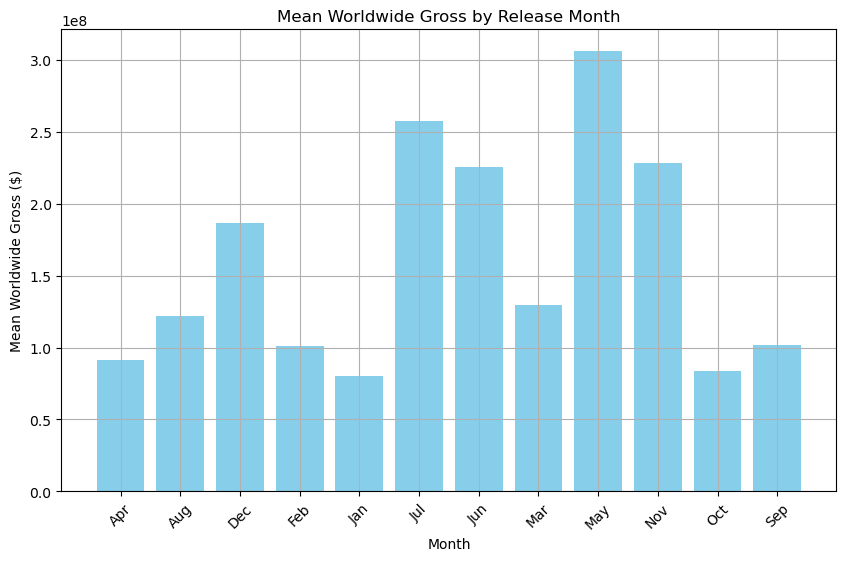

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Remove commas from the 'Worldwide Gross ($)' column and convert it to float
movie_data['Worldwide Gross ($)'] = movie_data['Worldwide Gross ($)'].str.replace(',', '').astype(float)

# Create a box plot to show the distribution of worldwide gross by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Worldwide Gross ($)', data=movie_data, palette='viridis')
plt.title('Worldwide Gross by Release Month')
plt.xlabel('Month')
plt.ylabel('Worldwide Gross ($)')
plt.xticks(rotation=45)
plt.show()


# Calculate the mean worldwide gross for each month
mean_gross_by_month = movie_data.groupby('Month')['Worldwide Gross ($)'].mean().reset_index()

# Plot check plot for the mean worldwide gross by month
plt.figure(figsize=(10, 6))
plt.bar(mean_gross_by_month['Month'], mean_gross_by_month['Worldwide Gross ($)'], color='skyblue')
plt.title('Mean Worldwide Gross by Release Month')
plt.xlabel('Month')
plt.ylabel('Mean Worldwide Gross ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/qx/92wx9d5n3w73256cz259mbxw0000gn/T/ipykernel_82398/4230383803.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Budget ($)'] = data['Budget ($)'].str.replace(r'[^\d.]', '').astype(float)
/var/folders/qx/92wx9d5n3w73256cz259mbxw0000gn/T/ipykernel_82398/4230383803.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Worldwide Gross ($)'] = data['Worldwide Gross ($)'].str.replace(r'[^\d.]', '').astype(float)


Linear Regression Model:
Mean Squared Error: 1.7633600486871394e+16
R-squared: 0.5518307769665023
Coefficients: [ 3.09140166e+00 -7.67486886e+05]
Intercept: 86137449.26534271


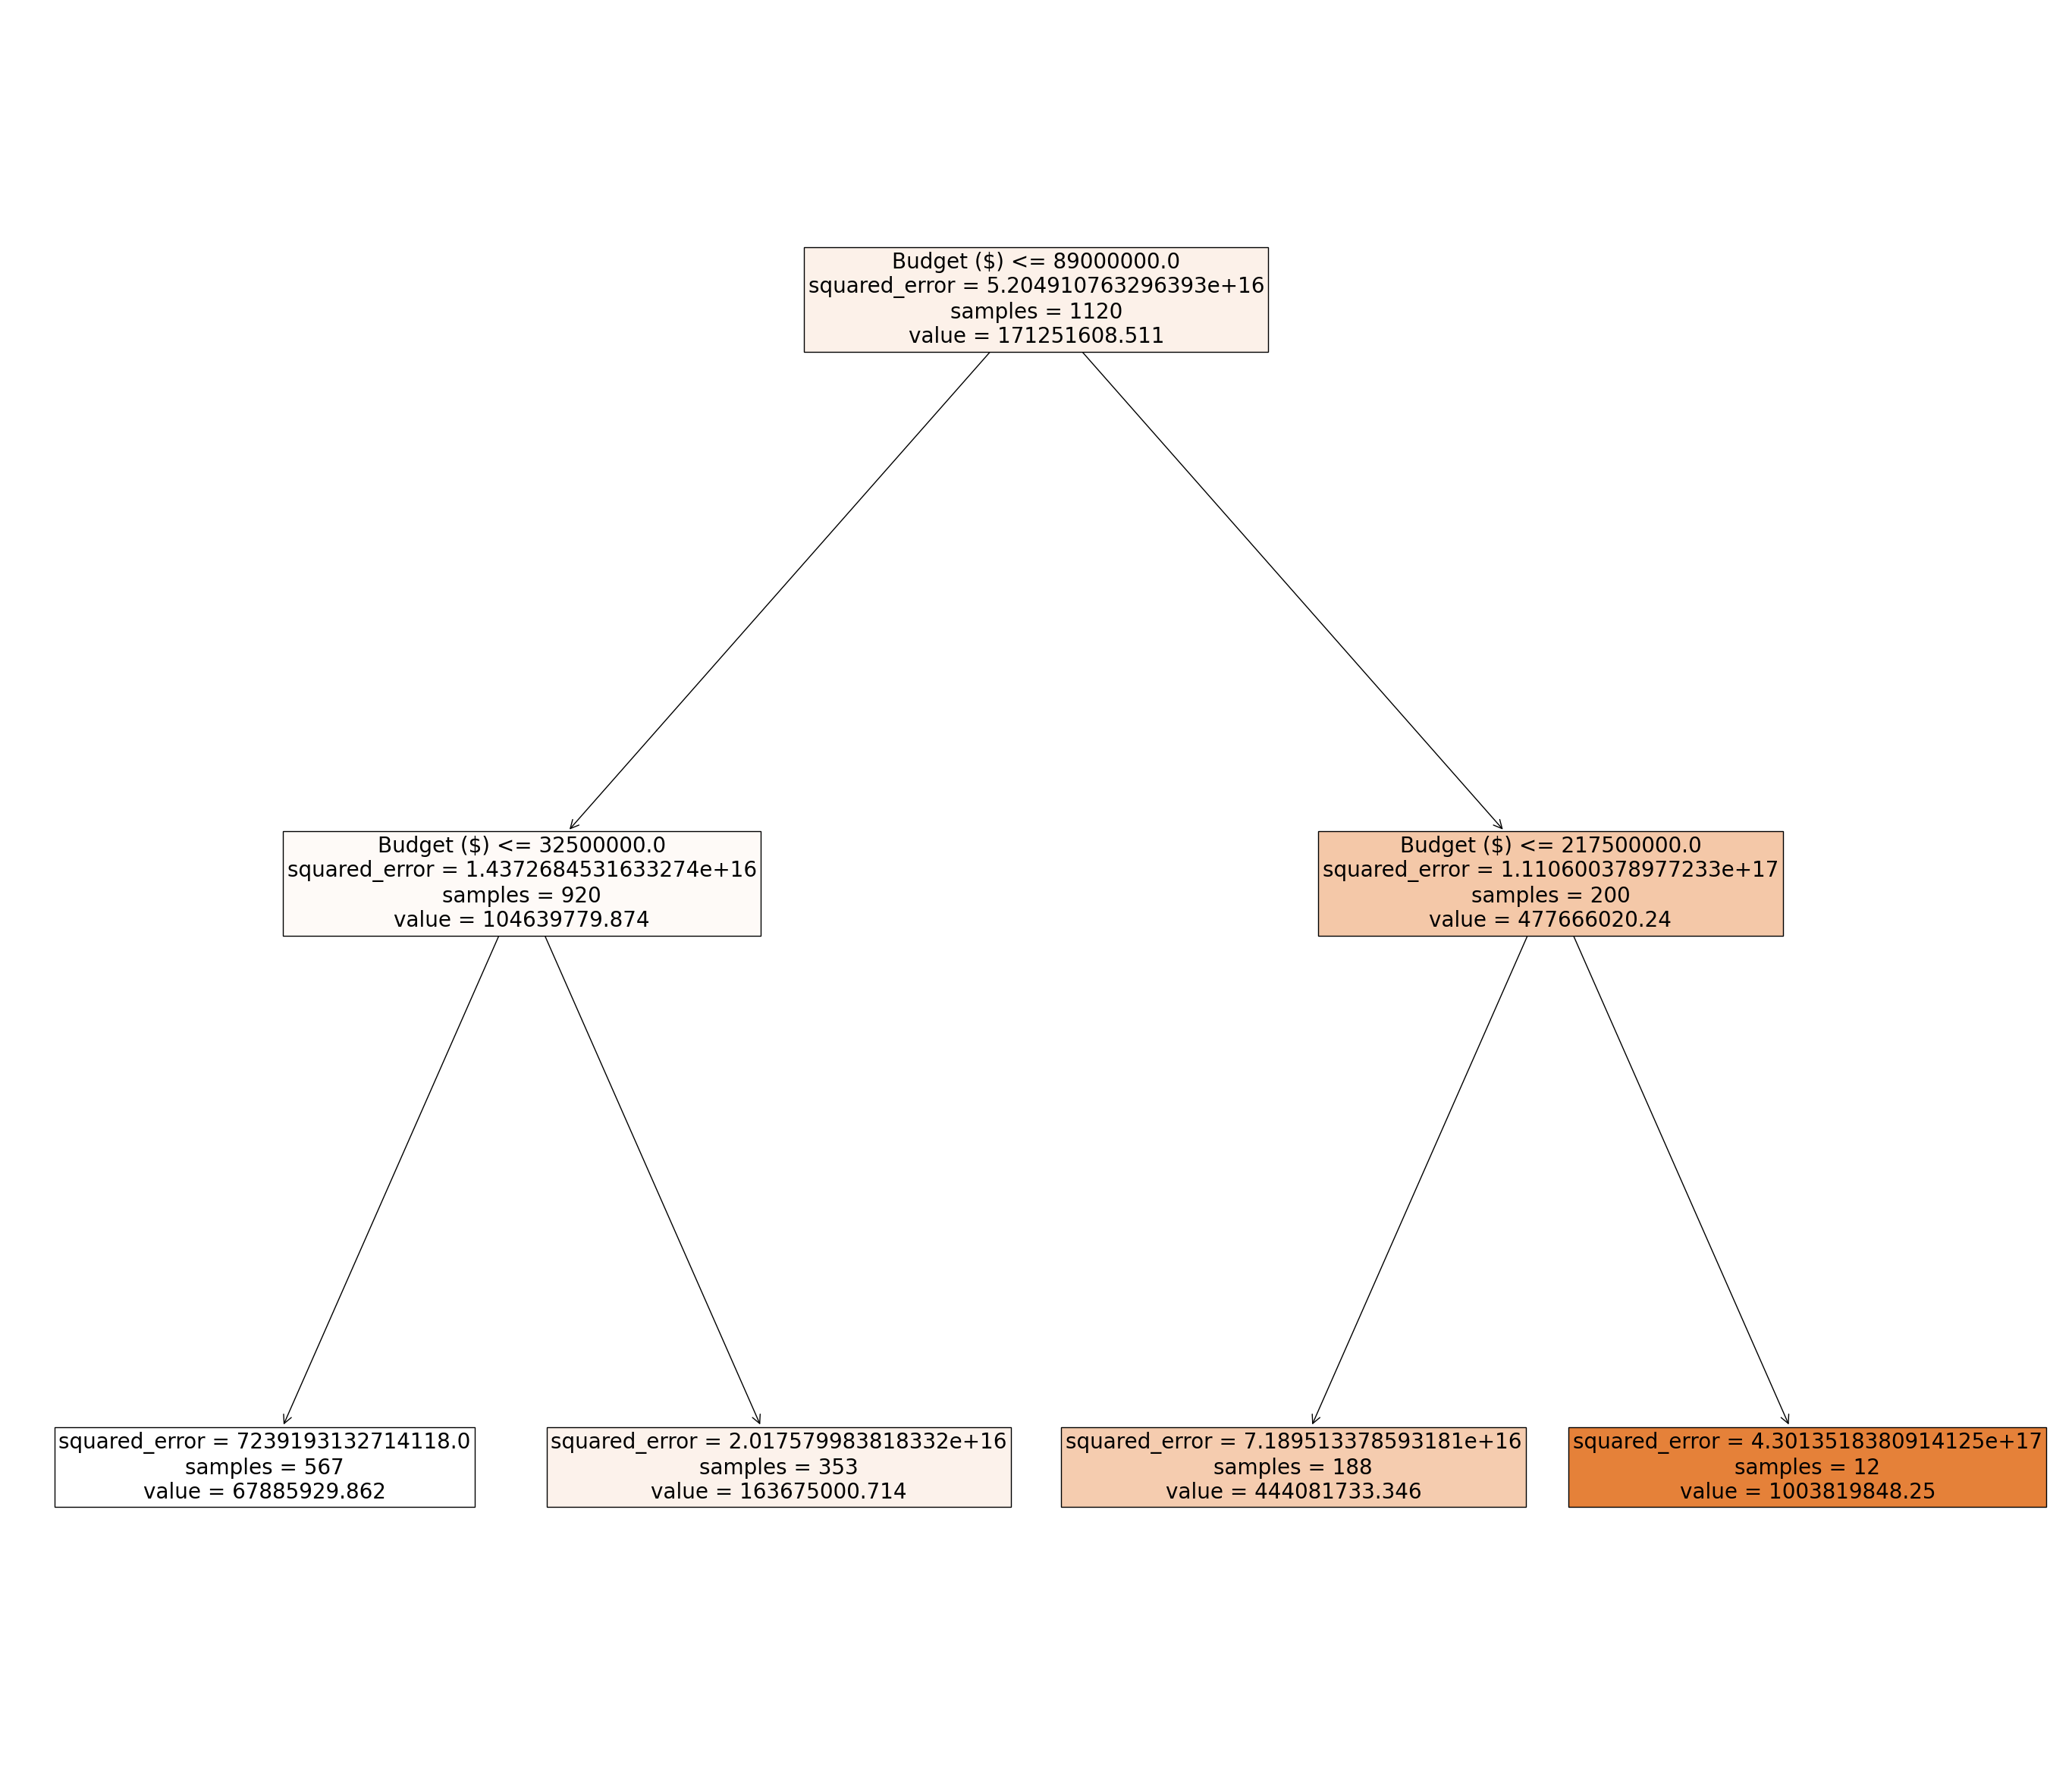


Decision Tree Model:
Mean Squared Error: 2.11845800358845e+16
R-squared: 0.4615803628962786


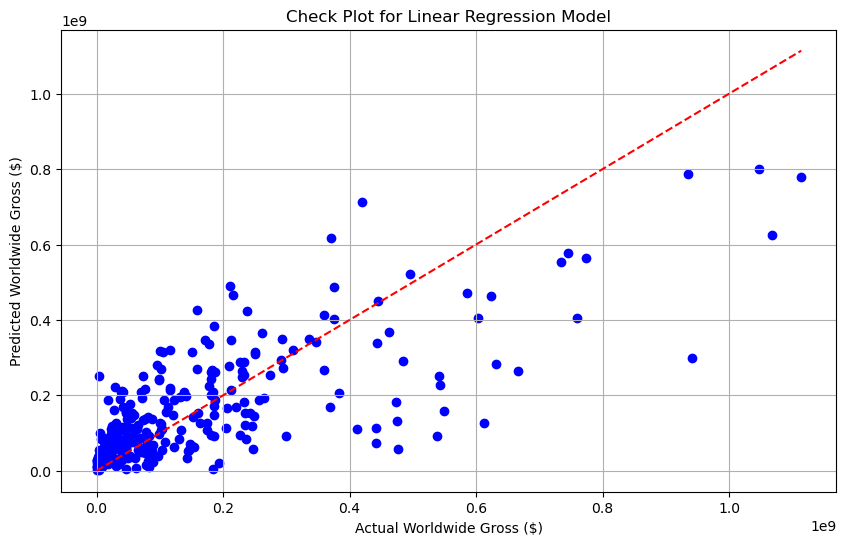

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Step 1: Load the data
movie_data = pd.read_csv('all-movie-data-bad-gross.csv')

# Step 2: Prepare the data
# For simplicity, let's consider only numerical features for now
# Select relevant features and handle missing values if necessary
selected_features = ['Budget ($)', 'Length (minutes)']
data = movie_data[selected_features + ['Worldwide Gross ($)']].dropna()

# Remove non-numeric characters from the 'Budget ($)' and 'Worldwide Gross ($)' columns and convert them to float
data['Budget ($)'] = data['Budget ($)'].str.replace(r'[^\d.]', '').astype(float)
data['Worldwide Gross ($)'] = data['Worldwide Gross ($)'].str.replace(r'[^\d.]', '').astype(float)

# Step 3: Split the data into training and testing sets
X = data[selected_features]
y = data['Worldwide Gross ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the linear regression model
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model:")
print(f'Mean Squared Error: {mse_lr}')
print(f'R-squared: {r2_lr}')

# Step 6: Interpret the linear regression results
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)

# Step 7: Fit a decision tree model
tree_model = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_model.fit(X_train, y_train)

# Step 8: Display the decision tree
plt.figure(figsize=(35, 30))
plot_tree(tree_model, feature_names=selected_features, filled=True, fontsize=20)
plt.show()

# Step 9: Evaluate the decision tree model
y_pred_dt = tree_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Model:")
print(f'Mean Squared Error: {mse_dt}')
print(f'R-squared: {r2_dt}')


# Plot check plot for the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Check Plot for Linear Regression Model')
plt.xlabel('Actual Worldwide Gross ($)')
plt.ylabel('Predicted Worldwide Gross ($)')
plt.grid(True)
plt.show()
